## Assignment 13

* Due date: 17 Nov 2020 by 3:30pm

## Problem 01

Orlando et al. 2008 consider a number of alternate Boolean updating functions for their cell-cycle TF network model.


1. One of the models that Orlando et al considered was to change the SFF function from AND to OR logic (all other functions were kept the same) [2 pts]

  * $SFF = SBF \lor HCM1$
  
Re-implement the Orlando et al. model using the change specified above.

NOTE: To save time you can copy the functions you defined in class, as well as those provided to you (e.g. `plot_simulation`, `cell_cycle`, etc)


2. With these newly defined function, given the following initial conditions,  do you observe oscillatory behavior? If so, is the oscillatory behavior the same as that observed when the SFF function used AND logic?  [3 pts]

```
MBF = [1]
SBF = [1]
YOX1 = [0]
HCM1 = [0]
YHP1 = [0]
SFF = [0]
ACE2 = [0]
SWI5 = [0]
CLN3 = [0]
```

3.  Given the OR version of the SFF function, what fraction of initial conditions produce oscillatory dynamics? [5 pts]



In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
## Based on the table above, define the functions in this code block

def fMBF(cln3):
    return cln3

def fSBF(cln3, mbf, yox1, yhp1):
    return (cln3 or mbf) and not(yox1 and yhp1)

def fHCM1(mbf, sbf):
    return mbf and sbf
    
def fYHP1(mbf, sbf):
    return mbf or sbf
    
def fSFF(sbf, hcm1):
    return sbf or hcm1
    
def fCLN3(swi5, ace2, yox1, yhp1):
    return (swi5 and ace2) and not(yox1 and yhp1)

def fSWI5(sff):
    return sff

def fACE2(sff):
    return sff

def fYOX1(mbf, sbf):
    return mbf and sbf

In [3]:
def plot_simulation(simulation_df):
    """2D simulation data frame -> figure
    """
    names = simulation_df.index
    plt.imshow(simulation_df, interpolation='none', cmap='copper')
    plt.xlabel('Time units')
    plt.yticks(range(len(names)), names)

In [4]:
def cell_cycle(initvals, nsteps=20):
    if len(initvals) != 9:
        raise Exception("Wrong number of initial values!")
    
    nodes = MBF, SBF, YOX1, HCM1, YHP1, SFF, ACE2, SWI5, CLN3 = [[i] for i in initvals]
    for i in range(nsteps):
        mbf, sbf, yox1, hcm1, yhp1, sff, ace2, swi5, cln3 = [i[-1] for i in nodes]
        MBF.append(  fMBF(cln3) )
        SBF.append(  fSBF(cln3, mbf, yox1, yhp1) )
        YOX1.append( fYOX1(mbf,sbf) )
        HCM1.append( fHCM1(mbf,sbf) )
        YHP1.append( fYHP1(mbf,sbf) )
        SFF.append(  fSFF(sbf, hcm1) )
        ACE2.append( fACE2(sff) )
        SWI5.append( fSWI5(sff) )
        CLN3.append( fCLN3(swi5,ace2,yox1,yhp1) )        
    
    simulation = pd.DataFrame(data = np.array(nodes), index = names)
    return simulation
    

In [5]:
def went_to_all_off(simulation_df):
    """2D array representing simulation (genes in rows, time in cols) -> True/False
    
    Return True if at any time point in the array, all nodes are False (zero)
    """
    col_sums = np.sum(simulation_df, axis=0).tolist()  # sum over rows
    if 0 in col_sums:
        return True
    return False

In [6]:
def cell_cycle(initvals, nsteps=20):
    if len(initvals) != 9:
        raise Exception("Wrong number of initial values!")
    
    names = ['MBF', 'SBF', 'YOX1', 'HCM1', 'YHP1', 'SFF', 'ACE2', 'SWI5', 'CLN3']
    nodes = MBF, SBF, YOX1, HCM1, YHP1, SFF, ACE2, SWI5, CLN3 = [[i] for i in initvals]
    for i in range(nsteps):
        mbf, sbf, yox1, hcm1, yhp1, sff, ace2, swi5, cln3 = [i[-1] for i in nodes]
        MBF.append(  fMBF(cln3) )
        SBF.append(  fSBF(cln3, mbf, yox1, yhp1) )
        YOX1.append( fYOX1(mbf,sbf) )
        HCM1.append( fHCM1(mbf,sbf) )
        YHP1.append( fYHP1(mbf,sbf) )
        SFF.append(  fSFF(sbf, hcm1) )
        ACE2.append( fACE2(sff) )
        SWI5.append( fSWI5(sff) )
        CLN3.append( fCLN3(swi5,ace2,yox1,yhp1) )        
    
    simulation = pd.DataFrame(data = np.array(nodes), index = names)
    return simulation

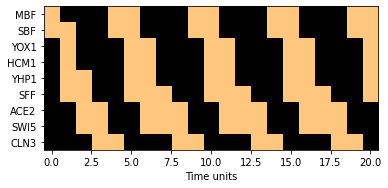

In [7]:
s1 = cell_cycle([1,1,0,0,0,0,0,0,0], nsteps=20)
plot_simulation(s1)

Went to all zeros? False


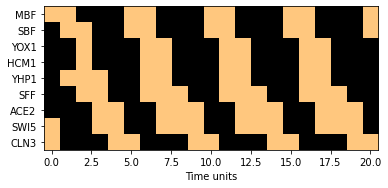

In [14]:
randstarts = np.random.randint(2, size=9)  # generate array of random 0s and 1s, of length 9
s = cell_cycle(randstarts)
plot_simulation(s)
print("Went to all zeros?", went_to_all_off(s))

In [17]:
from itertools import product
p = product([0,1], repeat=9)
p = list(p)
sum = 0
for i in p:
    if(went_to_all_off(cell_cycle(i)) == False):
        sum+=1
print("Problem 3:", sum/len(p))

Problem 3: 0.966796875


1. Implemeneted above.
2. We do observe oscillatory behavior with the initial conditions provided (represented by s1) though the dynamical behavior chart isn't the exact same when the SFF function is implemented with an AND operator instead of an OR operator, so the oscillatory behavior observed isn't the same as observed when the SFF function used AND logic.
3. Shown in code above.